# Analyze the quality of the grid objective.

We approximated the polygon instance by a graph instance.
Now we check how close the costs of the tour in the graph are to the actual tour in
the polygon.
The touring costs are of course equal, but the coverage of the tour is probably lower
and therefore the opportunity loss is higher.

In [1]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from pcpptc import PolygonInstance, Solution
from pcpptc.plot import setup_plot, plot_polygon_instance, plot_solution
from pcpptc.plot.polgyon_instance import plot_coverage

In [3]:
data = pd.read_json("./06c_prepared_data.json")
from utils import show_solver_diffs

show_solver_diffs(data)

Solver 0:  with 387 entries


In [4]:
data["solver"].unique()

array(['MeshAlgorithm(0.95, full_coverage=False, GridSolver(GridSolverParameter(k=3, r=2, adaptive=True, integralize=50, cc_opt_steps=25, cc_opt_size=50, t_opt_steps=25, t_opt_size=50, callbacks=DefaultCallbacks)))'],
      dtype=object)

In [5]:
data["area"] = data["area_x"]
data.columns

Index(['solution', 'coverage', 'touring_cost', 'length', 'integralization',
       'turn_sum', 'instance', 'instance_path', 'grid_lb', 'grid_obj',
       'grid_obj_tour', 'grid_obj_loss', 'runtime', 'timestamp', 'hostname',
       'argv', 'git_revision', 'cwd', 'solver', 'i', 'turn_factor',
       'point_based', 'area_x', 'Obj', 'touring_cost_min', 'relative_cost',
       'relative_coverage', 'type', 'Obj_min', 'relative_obj', 't_opt_steps',
       't_opt_size', 'cc_opt_steps', 'area_y', 'grid_opt_gap', 'obj_gap',
       'value_sum', 'value_density', 'area'],
      dtype='object')

In [6]:
data[data.isna().any(axis=1)]

,solution,coverage,touring_cost,length,integralization,turn_sum,instance,instance_path,grid_lb,grid_obj,...,relative_obj,t_opt_steps,t_opt_size,cc_opt_steps,area_y,grid_opt_gap,obj_gap,value_sum,value_density,area


In [7]:
# data.dropna(inplace=True)
data.drop_duplicates(subset=["instance"], inplace=True)

In [8]:
from pcpptc.instance_converter.dmsh import GmshGrid

data["tc/valuesum"] = data["grid_obj_tour"] / data["value_sum"]
data["tc/valuesum"]

3       0.041773
9       0.042802
15      0.422407
21      0.205561
27      0.275572
          ...   
2360    0.065195
2366    0.111300
2372    0.181143
2378    0.097061
2384    0.084244
Name: tc/valuesum, Length: 387, dtype: float64

In [9]:
# data = data[data["relative_cost"]<=1000]


data[data["value_density"] > 30]

,solution,coverage,touring_cost,length,integralization,turn_sum,instance,instance_path,grid_lb,grid_obj,...,t_opt_steps,t_opt_size,cc_opt_steps,area_y,grid_opt_gap,obj_gap,value_sum,value_density,area,tc/valuesum
3,"{'waypoints': [[-14.0087812136, 26.7624438714]...",1888.723561,2966.235523,998.481020,50,240.526155,75,../05_partical_coverage/instances2/75.instance...,2739.771946,2869.087473,...,25,50,25,2022.358599,4.719938,2.511426,68216.372004,33.731096,2022.358599,0.041773
111,"{'waypoints': [[10.0735507683, -4.3875965024],...",2376.980587,5766.311927,1255.912615,50,254.748319,86,../05_partical_coverage/instances2/86.instance...,5002.796887,5209.875238,...,25,50,25,2492.969981,4.139252,1.750098,86997.039323,34.896946,2492.969981,0.059886
177,"{'waypoints': [[7.9742246709, 40.8408630597], ...",2024.244847,4464.431174,1131.500674,50,137.573562,3,../05_partical_coverage/instances2/3.instance....,4306.016072,4526.381861,...,25,50,25,2113.609580,5.117626,1.327803,80373.905467,38.026846,2113.609580,0.054144
445,"{'waypoints': [[35.4880319436, -23.3233390308]...",3382.616278,2446.676219,1780.925707,50,133.150102,38,../05_partical_coverage/instances2/38.instance...,2310.604937,2446.676219,...,25,50,25,3438.231134,5.888990,1.551816,109167.828013,31.751160,3438.231134,0.022412
494,"{'waypoints': [[8.41491246, -14.8898522804], [...",541.902527,3093.237029,297.259236,50,68.304526,5,../05_partical_coverage/instances2/5.instance....,2331.907577,2407.552129,...,25,50,25,582.653453,3.243891,1.862505,22505.054319,38.625111,582.653453,0.100131
500,"{'waypoints': [[-18.9213663965, 13.5227905465]...",2042.798165,20918.021531,1163.413092,50,204.920076,180,../05_partical_coverage/instances2/180.instanc...,24820.134745,25365.420505,...,25,50,25,2340.967926,2.196949,1.197377,114741.021666,49.014350,2340.967926,0.172258
603,"{'waypoints': [[32.107531515, -32.8264213297],...",4017.707862,3936.871120,2092.391129,50,266.774525,121,../05_partical_coverage/instances2/121.instanc...,3463.058852,3597.964734,...,25,50,25,4219.353655,3.895570,2.132241,169316.611913,40.128566,4219.353655,0.020698
696,"{'waypoints': [[-14.9391169269, -12.1347882968...",539.447590,328.583386,276.332737,50,52.250649,96,../05_partical_coverage/instances2/96.instance...,322.006307,328.583386,...,25,50,25,583.203825,2.042531,5.543692,20951.222630,35.924357,583.203825,0.015683
796,"{'waypoints': [[-4.5971769126, 28.5410804974],...",3275.141393,10819.959387,2065.931836,50,148.801572,44,../05_partical_coverage/instances2/44.instance...,8609.248778,10970.557107,...,25,50,25,3342.732139,27.427577,1.148493,141035.948206,42.191819,3342.732139,0.076846
844,"{'waypoints': [[-16.3399979194, 15.7604737175]...",1556.268501,1293.770355,812.117484,50,150.305676,194,../05_partical_coverage/instances2/194.instanc...,1239.491853,1292.201507,...,25,50,25,1659.201589,4.252521,3.492672,61054.018929,36.797228,1659.201589,0.021163


Computing coverage polygon
Plotting coverage polygon
1492.981806999389 19458.240822714335
328.5833864209731
Computing coverage polygon
Plotting coverage polygon
5380.863804905282 75008.26426913876
840.3184403570347
Computing coverage polygon
Plotting coverage polygon
2431.4410805169027 34049.95107586884
430.0203401700876


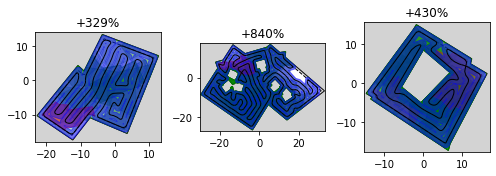

In [10]:
def plot(row, path=None, ax=None):
    instance_path = row["instance_path"]
    instance = PolygonInstance.from_json(file_path=instance_path)
    solution = Solution.from_json(data=row["solution"])
    if not ax:
        ax = setup_plot(figsize=(3.5, 2.5))
    plot_polygon_instance(ax, instance, set_limits=True, plot_valuable_areas=True)
    plot_solution(ax, solution, color="black")
    plot_coverage(ax, instance, solution)
    ax.set_aspect("equal", "box")
    ax.set_title(f"+{round(row['grid_obj_tour'])}%")
    print(
        instance.compute_missed_covering_value(solution),
        instance.compute_covering_value(solution),
    )
    print(instance.compute_touring_cost(solution))
    if path:
        plt.tight_layout()
        plt.savefig(path)


fig, axes = plt.subplots(1, 3, figsize=(7, 3.5))
j = 0
for i, row in data[data["obj_gap"] > 5].iterrows():
    plot(row, ax=axes[j])
    j += 1
plt.tight_layout()
plt.savefig("./07_examples.pdf")
plt.show()